In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/twitter-suicidal-intention-dataset/master/twitter-suicidal_data.csv")

In [3]:
data.head(10)

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1
5,i am great and wonderful i am worth it except ...,1
6,i ll be dead just you wait and see my last wor...,1
7,health anxiety prompting some bad thoughts in ...,1
8,everything is okay but nothing feels okay i ve...,1
9,ptsd and alcohol i had some extremely horrible...,1


In [4]:
data['intention'].value_counts()

0    5121
1    3998
Name: intention, dtype: int64

In [5]:
!pip install pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-kifhcqql
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-kifhcqql
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=8f3f6a94a8738ef5fcf4efd996c91e9c9409edbd7dff11f83650bbf5b178d36c
  Stored in directory: /tmp/pip-ephem-wheel-cache-qqfpeepr/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [6]:
import preprocess_kgptalkie as ps
import re

def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)# contraction to expansion
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_rt(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [7]:
data['tweet'] = data['tweet']. apply(lambda x: get_clean(x)) 

# tfidf

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
vectorizer = TfidfVectorizer(max_features = 20000, ngram_range=(1,3), analyzer='char')

X = data['tweet']
y = data['intention']

X = vectorizer.fit_transform(X)

In [10]:
X.shape

(9119, 10404)

In [11]:
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state =42, test_size =0.20)

In [12]:
linearSVCClassifier = LinearSVC()
linearSVCClassifier.fit(X_train, y_train)

LinearSVC()

In [13]:
y_predlinearsvc = linearSVCClassifier.predict(X_test)

In [14]:
print(classification_report(y_test, y_predlinearsvc))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1019
           1       0.91      0.90      0.91       805

    accuracy                           0.92      1824
   macro avg       0.92      0.92      0.92      1824
weighted avg       0.92      0.92      0.92      1824



In [15]:
x = 'n one cares me i will die alone'

x = get_clean(x)
vec = vectorizer.transform([x])

linearSVCClassifier.predict(vec)

array([1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


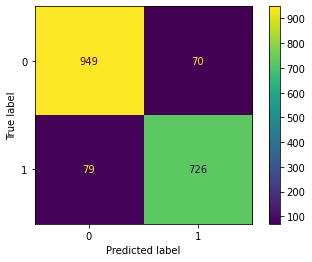

In [16]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(linearSVCClassifier,X_test,y_test)


In [17]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(solver='lbfgs',random_state = 0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [18]:
# Predicting the Test set results
y_predlr = lr_classifier.predict(X_test)

In [19]:
print(classification_report(y_test, y_predlr))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1019
           1       0.90      0.87      0.89       805

    accuracy                           0.90      1824
   macro avg       0.90      0.90      0.90      1824
weighted avg       0.90      0.90      0.90      1824



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


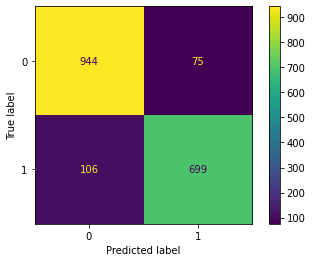

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr_classifier,X_test,y_test)

In [21]:
from sklearn.tree import DecisionTreeClassifier
dctclassifier = DecisionTreeClassifier(criterion="entropy")
dctclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
dcty_pred = dctclassifier.predict(X_test)

In [23]:
print(classification_report(y_test, dcty_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1019
           1       0.87      0.86      0.87       805

    accuracy                           0.88      1824
   macro avg       0.88      0.88      0.88      1824
weighted avg       0.88      0.88      0.88      1824



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


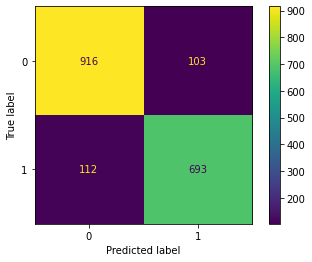

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dctclassifier,X_test,y_test)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators=50, criterion="entropy")

In [26]:
rfclassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [27]:
rfypred = rfclassifier.predict(X_test)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfypred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1019
           1       0.96      0.83      0.89       805

    accuracy                           0.91      1824
   macro avg       0.92      0.90      0.91      1824
weighted avg       0.91      0.91      0.91      1824



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


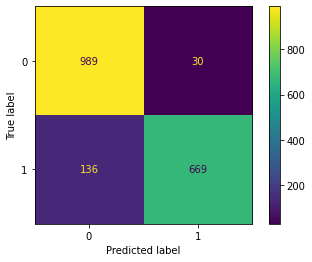

In [29]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfclassifier,X_test,y_test)

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
clf_adb = AdaBoostClassifier(n_estimators=100, random_state=0)
model_svm = SVC(C = 10.0,probability=True) 
clf_gb = GradientBoostingClassifier(random_state=0)
clfbag = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0).fit(X_train, y_train)

In [31]:
model_svm.fit(X_train, y_train) # training model
clf_adb.fit(X_train,y_train)
clf_gb.fit(X_train,y_train)
clfbag.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC(), random_state=0)

In [32]:

y_pred_svm = model_svm.predict(X_test) # we use this for evaluation
y_pred_adb=clf_adb.predict(X_test)
y_pred_gb=clf_gb.predict(X_test)
y_pred_bag=clfbag.predict(X_test)

In [33]:
print("---------------SVM performance------------------------\n\n")
print(classification_report(y_test,y_pred_svm))
print("---------------Adaboost performance------------------------\n\n")
print(classification_report(y_test,y_pred_adb))
print("---------------Gradient performance------------------------\n\n")
print(classification_report(y_test,y_pred_gb))
print("---------------bagging performance------------------------\n\n")
print(classification_report(y_test,y_pred_adb))

---------------SVM performance------------------------


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1019
           1       0.94      0.90      0.92       805

    accuracy                           0.93      1824
   macro avg       0.93      0.93      0.93      1824
weighted avg       0.93      0.93      0.93      1824

---------------Adaboost performance------------------------


              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1019
           1       0.92      0.88      0.90       805

    accuracy                           0.91      1824
   macro avg       0.91      0.91      0.91      1824
weighted avg       0.91      0.91      0.91      1824

---------------Gradient performance------------------------


              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1019
           1       0.96      0.86      0.91       805

 

# Hence SVM is Having best Accuracy looking confusion matrix of SVM

---------------SVM Confusion matrix------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


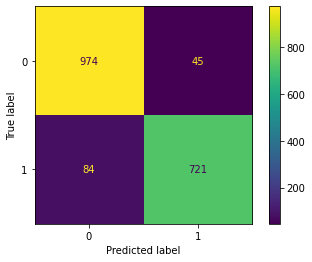

In [34]:
#Confusion Matrixes
print("---------------SVM Confusion matrix------------------------")
plot_confusion_matrix(model_svm,X_test,y_test)


# Hence Compared to All models svm is giving best accuracy soo for realtime prediction SvM is the best model

In [35]:
x = 'n one cares me i will die alone'

x = get_clean(x)
vec = vectorizer.transform([x])

model_svm.predict(vec)

array([1])

# suicidal intended tweet it is

In [36]:
x = 'i am so happy and thanks a lot for making it special'

x = get_clean(x)
vec = vectorizer.transform([x])

model_svm.predict(vec)

array([0])

# not suicidal intended